# 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

### Load the dataset

In [7]:
df = pd.read_csv('online_retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


### Explore the dataset to understand the structure and data types

In [9]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [11]:
print("\nDataset Information (Data Types, Non-Null Counts):")
df.info()


Dataset Information (Data Types, Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
print("\nShape of the dataset (rows, columns):", df.shape)


Shape of the dataset (rows, columns): (541909, 8)


### Identify missing values, duplicates, and unusual records

In [15]:
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- Missing Values Check ---
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [17]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 5268


### Data Preprocessing (as per project requirements)

In [21]:
# 1. Remove rows with missing CustomerID 
initial_rows = df.shape[0]
df.dropna(subset=['CustomerID'], inplace=True)
print(f"After dropping missing CustomerID: {df.shape}")

After dropping missing CustomerID: (406829, 8)


In [29]:
# 2. Exclude cancelled invoices (InvoiceNo starting with 'C') 
initial_rows = df.shape[0]
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Removed cancelled invoices :{initial_rows - df.shape[0]} .")
print(f"New shape after removing cancelled invoices: {df.shape}")

Removed cancelled invoices :0 .
New shape after removing cancelled invoices: (397924, 8)


In [10]:
# 3. Remove negative or zero quantities and prices 
initial_rows = df.shape[0]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print(f"Removed {initial_rows - df.shape[0]} rows with non-positive Quantity or UnitPrice.")
print(f"New shape after removing non-positive quantity/price: {df.shape}")

Removed 40 rows with non-positive Quantity or UnitPrice.
New shape after removing non-positive quantity/price: (397884, 8)


In [11]:
print("\nUpdated Dataset Information:")
df.info()


Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [31]:
print(" cleaned dataset:", df.shape)
print("\n Sample:")
print(df.head())

 cleaned dataset: (397924, 8)

 Sample:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  


# 2: Feature Engineering for RFM & Deeper EDA 

In [33]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Convert InvoiceDate to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### Feature Engineering (RFM)

In [45]:

latest_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f" Latest transaction date: {df['InvoiceDate'].max().strftime('%Y-%m-%d')}")
print(f" Recency calculation: {latest_date.strftime('%Y-%m-%d')}")

 Latest transaction date: 2023-12-09
 Recency calculation: 2023-12-10


In [53]:
# Calculate Monetary (Total amount spent per transaction)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [61]:
# Group by CustomerID to calculate RFM values
rfm_df = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (latest_date - date.max()).days),Frequency=('InvoiceNo', 'nunique'),Monetary=('TotalPrice', 'sum')).reset_index()

In [67]:
print("First 5 rows of RFM DataFrame:")
print(rfm_df.head())
print("RFM DataFrame Info:")
rfm_df.info()

First 5 rows of RFM DataFrame:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40
RFM DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


### Deeper Exploratory Data Analysis -2


--- Transaction Volume by Country (Top 10) ---
Country
United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: count, dtype: int64


C:\Users\ashah\AppData\Local\Temp\ipykernel_8644\4280711352.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_transactions.index, y=country_transactions.values, palette='viridis')


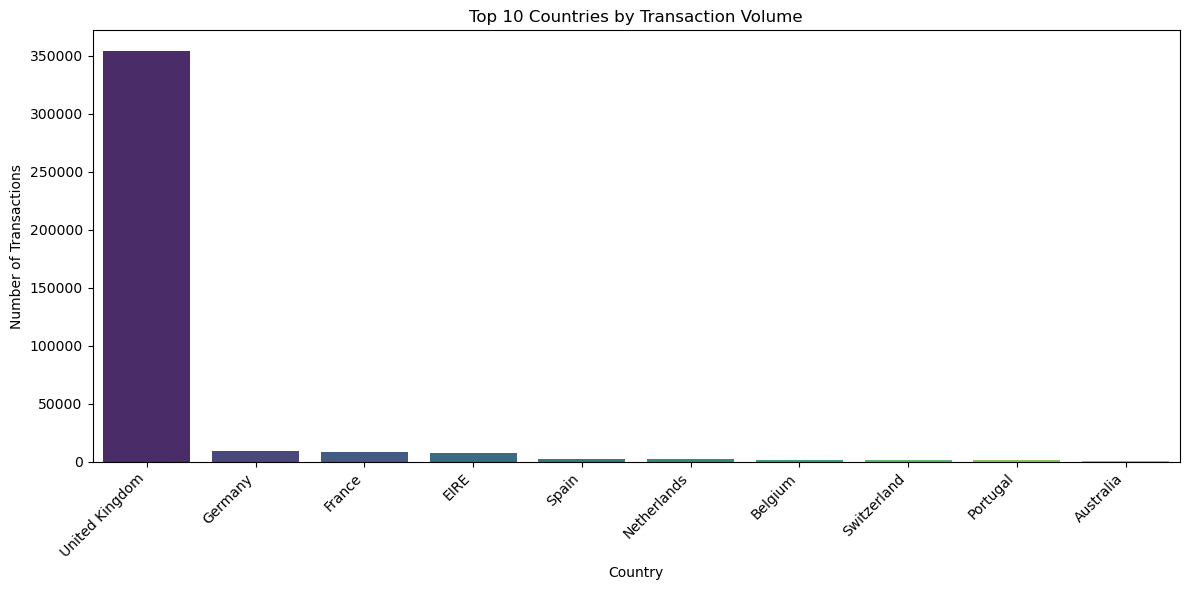

In [69]:
# Analyze transaction volume by country
print("\n--- Transaction Volume by Country (Top 10) ---")
country_transactions = df['Country'].value_counts().head(10)
print(country_transactions)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_transactions.index, y=country_transactions.values, palette='viridis')
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- Top 10 Selling Products (by Sales Revenue) ---
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalSales, dtype: float64


C:\Users\ashah\AppData\Local\Temp\ipykernel_8644\290842527.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_sales.values, y=top_products_sales.index, palette='viridis')


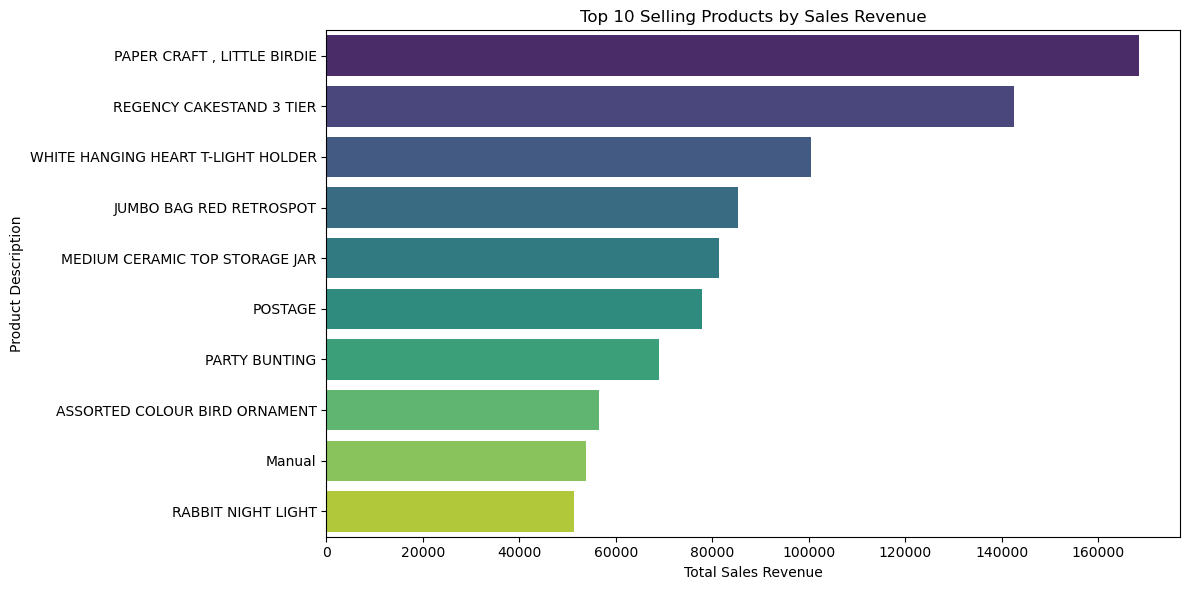

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales per product (Quantity * UnitPrice)
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by product description, sum total sales, sort descending, get top 10
top_products_sales = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

print("\n--- Top 10 Selling Products (by Sales Revenue) ---")
print(top_products_sales)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_sales.values, y=top_products_sales.index, palette='viridis')
plt.title('Top 10 Selling Products by Sales Revenue')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()



--- Top 10 Countries by Total Revenue ---
Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64


C:\Users\ashah\AppData\Local\Temp\ipykernel_8644\952643462.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_revenue.values, y=top_countries_revenue.index, palette='coolwarm')


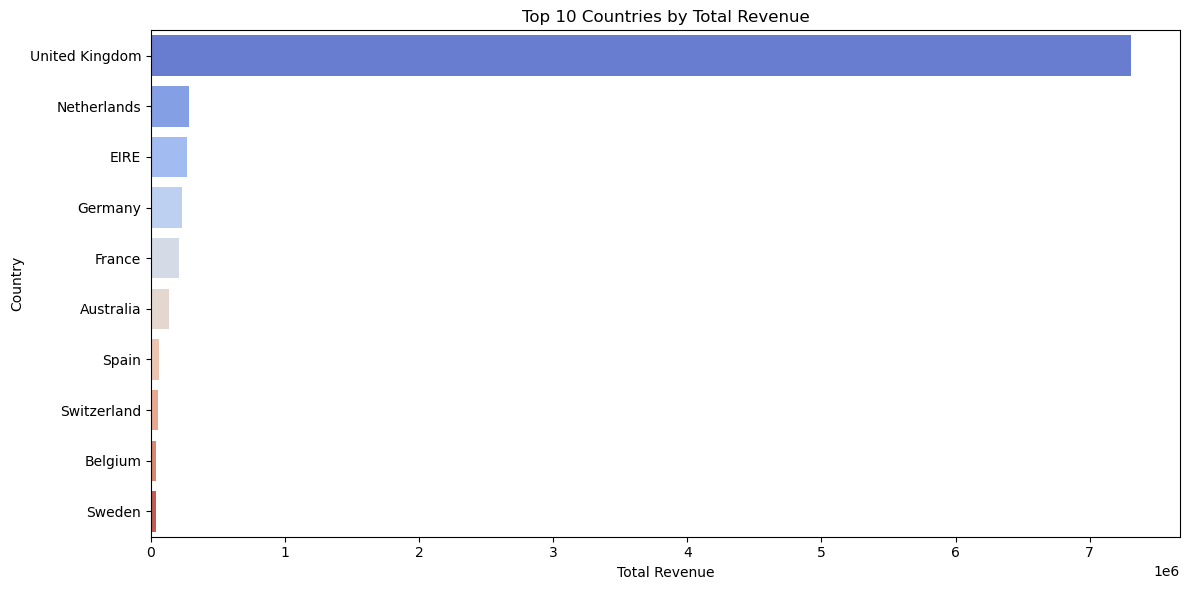

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'TotalPrice' exists
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by country, sum total revenue, sort descending and get top 10
top_countries_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

print("\n--- Top 10 Countries by Total Revenue ---")
print(top_countries_revenue)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_revenue.values, y=top_countries_revenue.index, palette='coolwarm')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



--- Transaction Trends Over Time ---
InvoiceMonth
2022-12    1400
2023-01     987
2023-02     998
2023-03    1321
2023-04    1149
2023-05    1555
2023-06    1393
2023-07    1331
2023-08    1281
2023-09    1756
2023-10    1929
2023-11    2658
2023-12     778
Freq: M, Name: InvoiceNo, dtype: int64


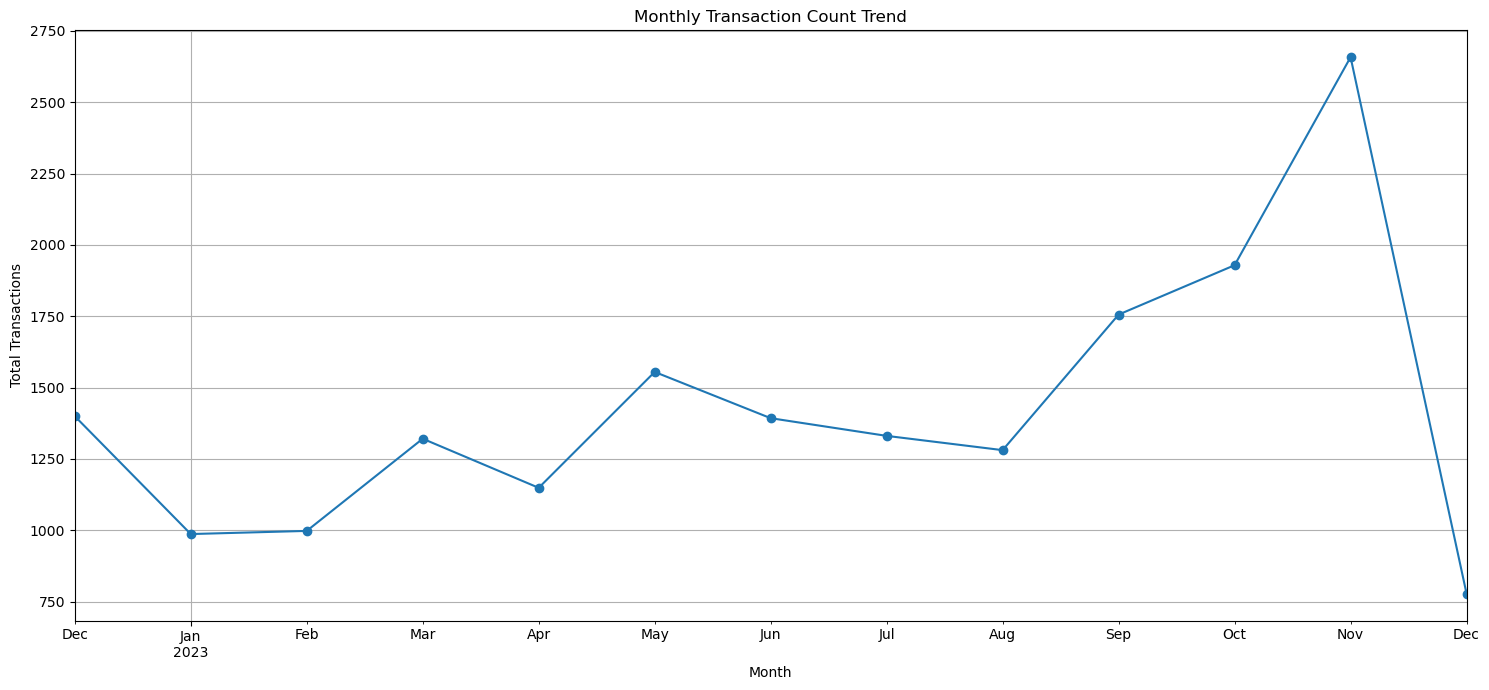

In [75]:
import matplotlib.pyplot as plt

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by month, count invoices
monthly_transactions = df.groupby('InvoiceMonth')['InvoiceNo'].nunique()  # or .count() for total rows

print("\n--- Transaction Trends Over Time ---")
print(monthly_transactions)

plt.figure(figsize=(15, 7))
monthly_transactions.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Transaction Count Trend')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()



--- Monetary Distribution per Customer ---


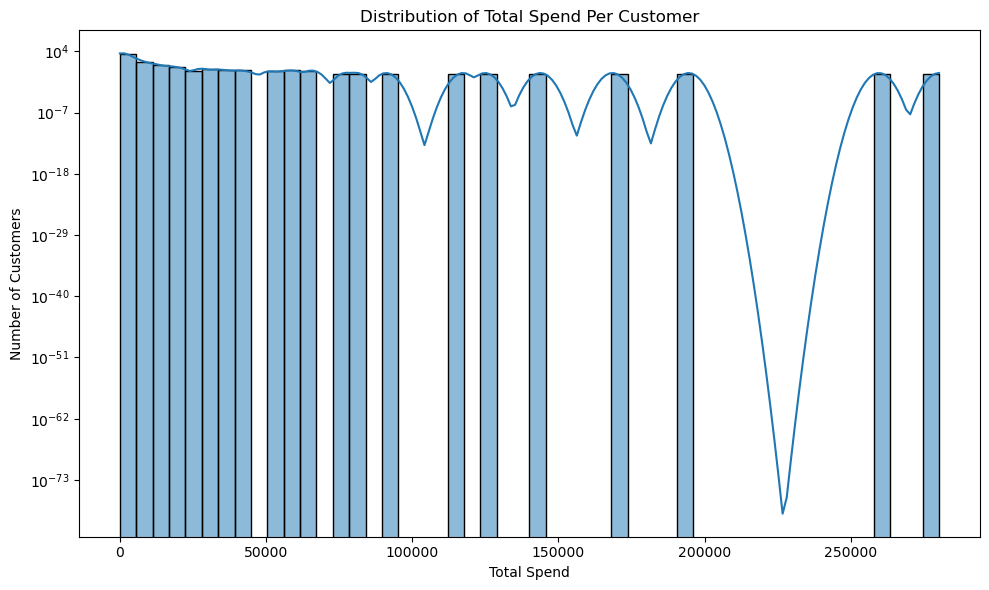

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total spend per customer
monetary_per_customer = df.groupby('CustomerID')['TotalPrice'].sum()

print("\n--- Monetary Distribution per Customer ---")
plt.figure(figsize=(10, 6))
sns.histplot(monetary_per_customer, bins=50, kde=True)
plt.title('Distribution of Total Spend Per Customer')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.yscale('log')  # Useful if there are customers with extremely high spend
plt.tight_layout()
plt.show()



--- Monetary Distribution per Customer (RFM Monetary) ---


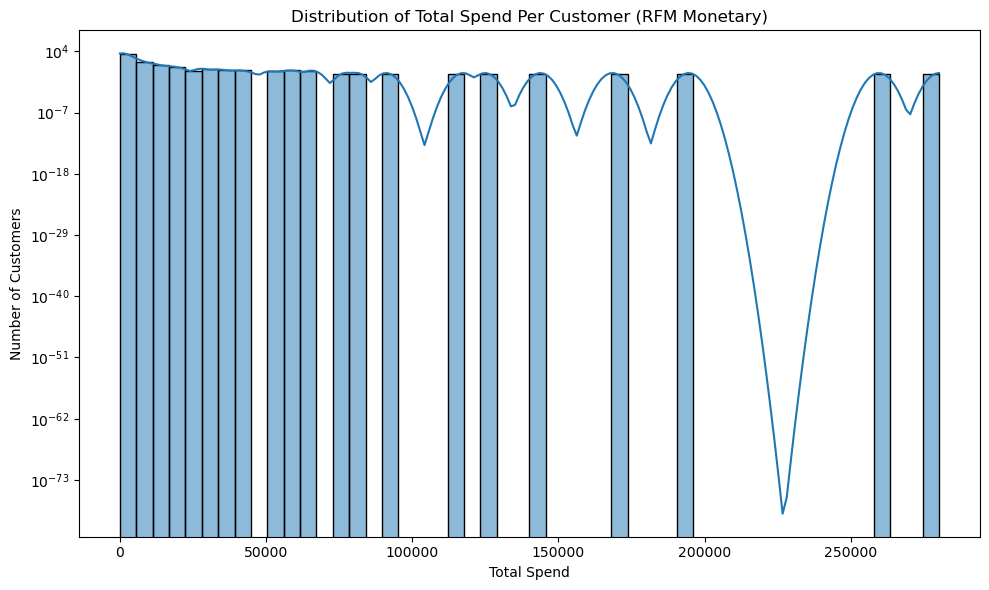

In [79]:
print("\n--- Monetary Distribution per Customer (RFM Monetary) ---")
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['Monetary'], bins=50, kde=True)
plt.title('Distribution of Total Spend Per Customer (RFM Monetary)')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.yscale('log') # Use log scale due to potential outliers
plt.tight_layout()
plt.show()


--- RFM Distributions ---


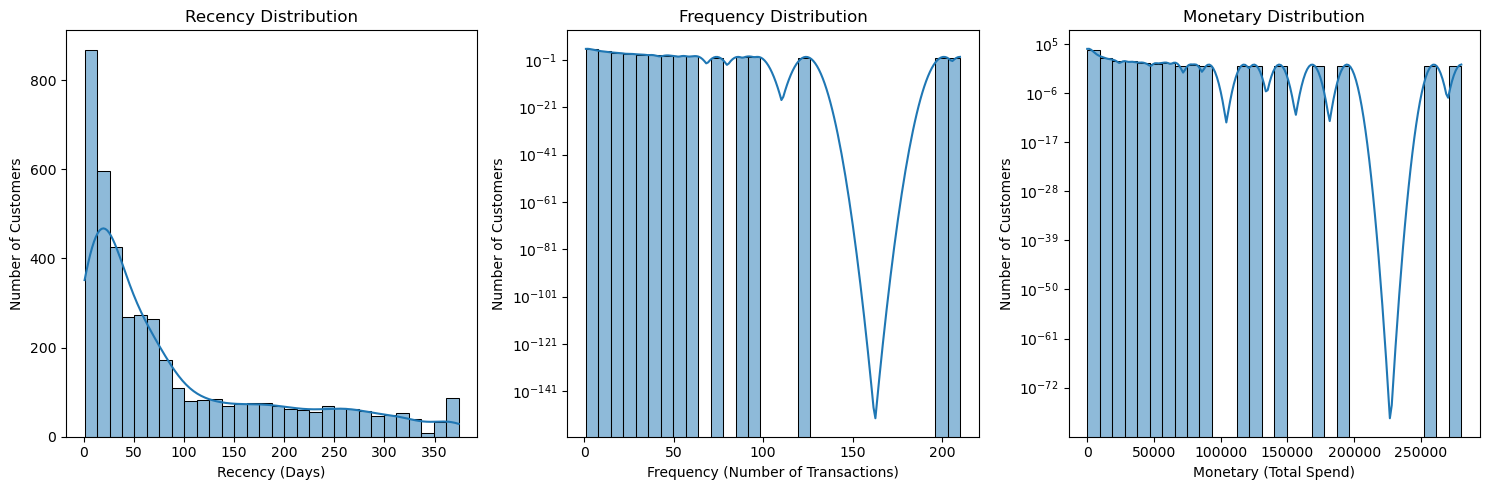

In [81]:
# RFM distributions (histograms for Recency, Frequency, Monetary)
print("\n--- RFM Distributions ---")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Frequency (Number of Transactions)')
plt.ylabel('Number of Customers')
plt.yscale('log') # Log scale is often useful for frequency due to skewness

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Monetary (Total Spend)')
plt.ylabel('Number of Customers')
plt.yscale('log') # Log scale is often useful for monetary due to skewness

plt.tight_layout()
plt.show()

# 3: Clustering

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib 

### Standardize/Normalize the RFM values

In [85]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Apply log1p transformation (already shown in your code)
rfm_df_log = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)

# Initialize and apply MinMaxScaler
minmax_scaler = MinMaxScaler()
rfm_minmax_scaled = minmax_scaler.fit_transform(rfm_df_log)
rfm_minmax_scaled_df = pd.DataFrame(rfm_minmax_scaled, columns=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'])

print("\n--- RFM Values Min-Max Scaled ---")
print("First 5 rows of Min-Max scaled RFM DataFrame:")
print(rfm_minmax_scaled_df.head())
print("MinMaxScaler fitted and RFM values transformed to [0,1] range.")



--- RFM Values Min-Max Scaled ---
First 5 rows of Min-Max scaled RFM DataFrame:
   Recency_Scaled  Frequency_Scaled  Monetary_Scaled
0        0.973830          0.000000         0.897210
1        0.077471          0.297570         0.667204
2        0.695021          0.196683         0.597496
3        0.439947          0.000000         0.595717
4        0.964245          0.000000         0.463621
MinMaxScaler fitted and RFM values transformed to [0,1] range.


### Choose Clustering Algorithm (KMeans) and Determine Number of Clusters

In [91]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you have your RFM dataframe named 'rfm_df' with columns 'Recency', 'Frequency', 'Monetary'
# If you want to log-transform to reduce skew (optional but recommended for clustering):
rfm_log = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)  # log1p(x) = log(1+x)

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)  # Now rfm_scaled is ready for clustering!



--- Running Silhouette Score to find optimal K ---
K=2: Silhouette Score = 0.4327
K=3: Silhouette Score = 0.3390
K=4: Silhouette Score = 0.3363
K=5: Silhouette Score = 0.3161
K=6: Silhouette Score = 0.3135
K=7: Silhouette Score = 0.3090
K=8: Silhouette Score = 0.3031
K=9: Silhouette Score = 0.2817
K=10: Silhouette Score = 0.2785


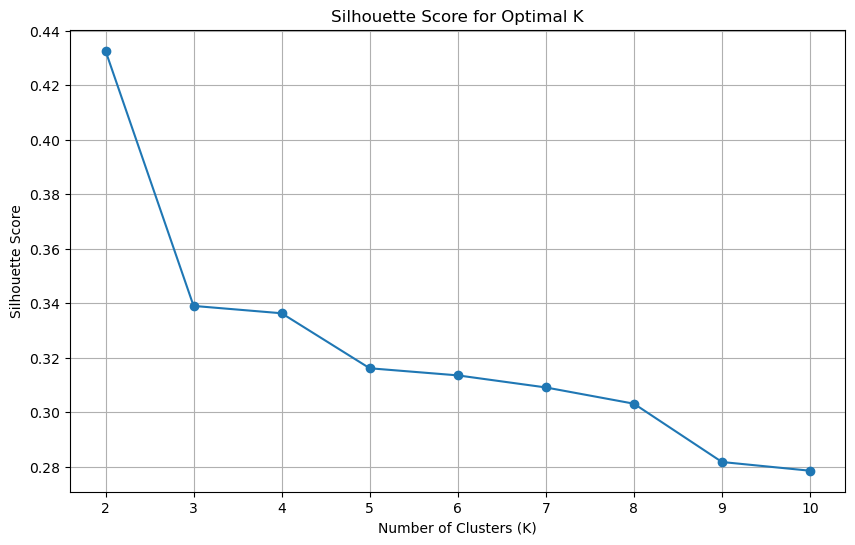

In [93]:
# Silhouette Score to find optimal K (for K > 1)
print("\n--- Running Silhouette Score to find optimal K ---")
silhouette_scores = {}
for k in range(2, 11): # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores[k] = score
    print(f"K={k}: Silhouette Score = {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(range(2, 11))
plt.show()

In [97]:
# Based on typical results for this dataset, K=4 or K=3 often gives good results.
# Let's choose K=4 as per the common RFM segmentation strategy (High-Value, Regular, Occasional, At-Risk).
optimal_k = 4
print(f"\nChoosing optimal number of clusters (K) = {optimal_k}")


Choosing optimal number of clusters (K) = 4


### Run Clustering

In [99]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(f"\nKMeans clustering with {optimal_k} clusters completed.")


KMeans clustering with 4 clusters completed.


### Label the clusters by interpreting their RFM averages

In [101]:
# Calculate median RFM values per cluster and count of customers
rfm_df_median = rfm_df.groupby('Cluster').agg({
    'Recency': 'median',
    'Frequency': 'median',
    'Monetary': 'median',
    'CustomerID': 'count'  # Cluster sizes
}).rename(columns={'CustomerID': 'Count'})

print("\n--- Median RFM Values by Cluster ---")
print(rfm_df_median)



--- Median RFM Values by Cluster ---
         Recency  Frequency  Monetary  Count
Cluster                                     
0           18.0        2.0   464.570    839
1            8.0       10.0  3722.420    723
2           56.0        4.0  1339.450   1183
3          178.0        1.0   296.815   1594


In [109]:
# Suppose your RFM data frame looks like this with a 'Cluster' column:
# rfm_df has columns: CustomerID, Recency, Frequency, Monetary, Cluster

# Aggregate RFM averages per cluster
rfm_df_avg = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'  # To get cluster sizes
}).rename(columns={'CustomerID': 'Count'})

# Now you can sort rfm_df_avg by 'Frequency', or any other metric, for interpretation
rfm_df_avg_sorted = rfm_df_avg.sort_values(by='Frequency', ascending=False)

print("\n--- RFM Averages for Each Cluster (Sorted by Frequency) ---")
print(rfm_df_avg_sorted)



--- RFM Averages for Each Cluster (Sorted by Frequency) ---
            Recency  Frequency     Monetary  Count
Cluster                                           
1         12.112033  13.634855  8015.424412    723
2         70.697380   4.076923  1791.090873   1183
0         18.725864   2.090584   538.231287    839
3        184.023839   1.318068   342.421268   1594


### Define the cluster to segment mapping based on your provided RFM Averages

In [111]:
cluster_to_segment_map = {
    1: 'High-Value',    # Recency=12, Freq=13, Monetary=8074
    2: 'Regular',       # Recency=71, Freq=4, Monetary=1802
    0: 'Occasional',    # Recency=18, Freq=2, Monetary=551
    3: 'At-Risk'        # Recency=182, Freq=1, Monetary=343
}

print("\nAssigned Cluster to Segment Mapping:")
print(cluster_to_segment_map)


Assigned Cluster to Segment Mapping:
{1: 'High-Value', 2: 'Regular', 0: 'Occasional', 3: 'At-Risk'}


In [113]:
rfm_df['Segment'] = rfm_df['Cluster'].map(cluster_to_segment_map)

print("\n--- Customer Segments Assigned ---")
print("Count of customers per segment:")
print(rfm_df['Segment'].value_counts())
print("\nSample of RFM DataFrame with Segments:")
print(rfm_df.head())


--- Customer Segments Assigned ---
Count of customers per segment:
Segment
At-Risk       1594
Regular       1183
Occasional     839
High-Value     723
Name: count, dtype: int64

Sample of RFM DataFrame with Segments:
   CustomerID  Recency  Frequency  Monetary  Cluster     Segment
0     12346.0      326          1  77183.60        2     Regular
1     12347.0        2          7   4310.00        1  High-Value
2     12348.0       75          4   1797.24        2     Regular
3     12349.0       19          1   1757.55        0  Occasional
4     12350.0      310          1    334.40        3     At-Risk


### Visualize the clusters using a scatter plot or 3D plot of RFM scores

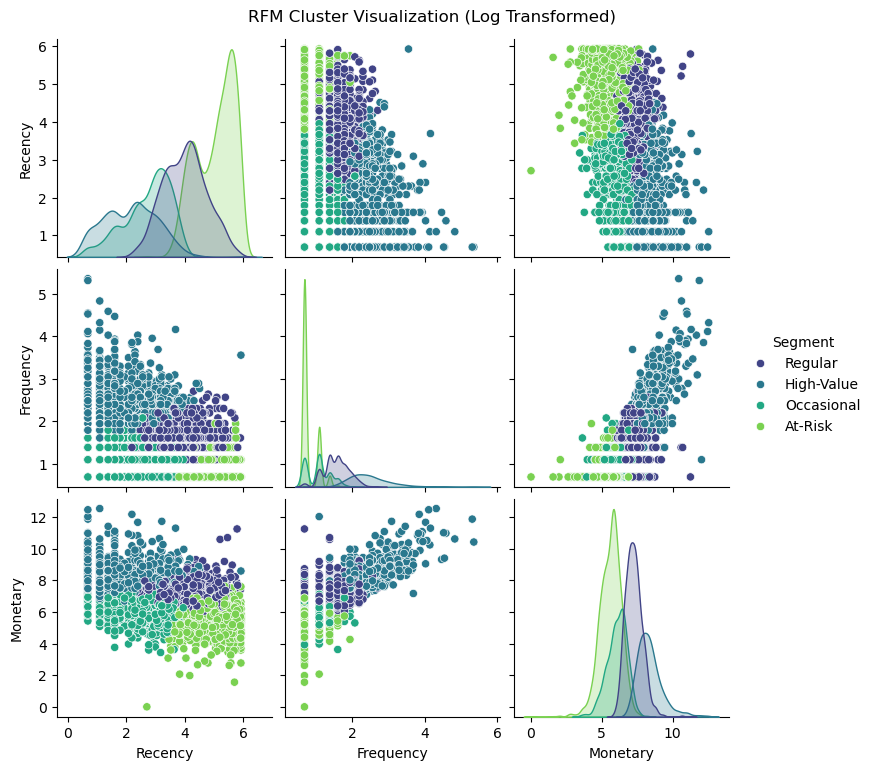

In [121]:
# Pairplot is good for visualizing relationships between RFM variables colored by segment
sns.pairplot(rfm_df_log.assign(Segment=rfm_df['Segment']), hue='Segment', diag_kind='kde', palette='viridis')
plt.suptitle('RFM Cluster Visualization (Log Transformed)', y=1.02)
plt.show()

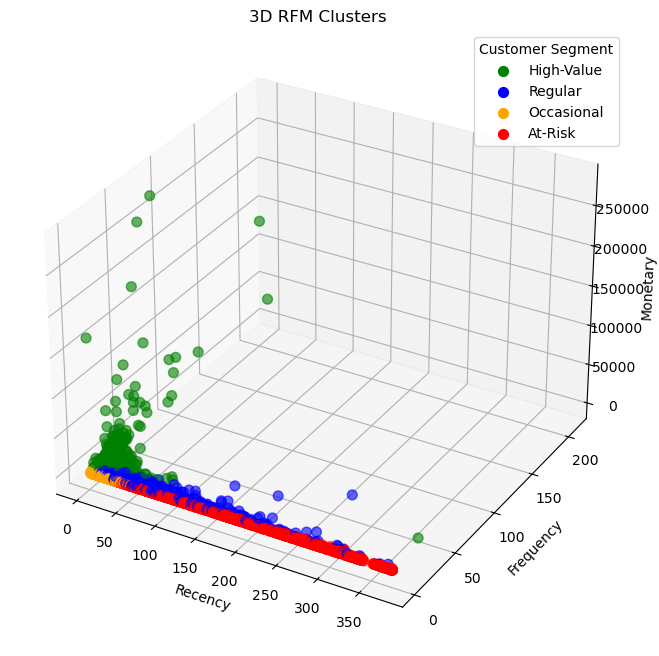

In [123]:
# 3D plot (requires mpl_toolkits.mplot3d)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Using original RFM values for better interpretability in 3D plot
# Assign colors based on mapped segments for consistency
segment_colors = {
    'High-Value': 'green',
    'Regular': 'blue',
    'Occasional': 'orange',
    'At-Risk': 'red'
}
colors = rfm_df['Segment'].map(segment_colors)

ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'],
           c=colors, s=50, alpha=0.6)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D RFM Clusters')

# Create custom legend
for segment, color in segment_colors.items():
    ax.scatter([], [], [], c=color, label=segment, s=50) # Empty scatter for legend proxy
ax.legend(title="Customer Segment")

plt.show()


### Model Evaluation for Clustering (Inertia, Silhouette Score)

In [125]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

print(f"\nModel Evaluation for chosen K={optimal_k}:")
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_kmeans.fit(rfm_scaled)

# Inertia (SSE)
print(f"Final Model Inertia (SSE): {final_kmeans.inertia_:.2f}")

# Silhouette Score
if optimal_k > 1:
    silhouette = silhouette_score(rfm_scaled, final_kmeans.labels_)
    print(f"Final Model Silhouette Score: {silhouette:.4f}")

    # Davies-Bouldin Score
    db_score = davies_bouldin_score(rfm_scaled, final_kmeans.labels_)
    print(f"Final Model Davies-Bouldin Score: {db_score:.4f}")



Model Evaluation for chosen K=4:
Final Model Inertia (SSE): 3952.59
Final Model Silhouette Score: 0.3363
Final Model Davies-Bouldin Score: 1.0124


### Save the best performing model for streamlit usage

In [133]:
import pickle

# Define file paths
model_filepath = 'kmeans_model.pkl'
scaler_filepath = 'scaler.pkl'
map_filepath = 'cluster_segment_map.pkl'

# Save KMeans model
with open(model_filepath, 'wb') as f:
    pickle.dump(final_kmeans, f)

# Save scaler
with open(scaler_filepath, 'wb') as f:
    pickle.dump(scaler, f)

# Save cluster-to-segment mapping (for segment label interpretation)
with open(map_filepath, 'wb') as f:
    pickle.dump(cluster_to_segment_map, f)

print(f"\nKMeans model saved to {model_filepath}")
print(f"StandardScaler saved to {scaler_filepath}")
print(f"Cluster to Segment Map saved to {map_filepath}")

with open(model_filepath, 'rb') as f:
    loaded_kmeans = pickle.load(f)
with open(scaler_filepath, 'rb') as f:
    loaded_scaler = pickle.load(f)
with open(map_filepath, 'rb') as f:
    loaded_map = pickle.load(f)



KMeans model saved to kmeans_model.pkl
StandardScaler saved to scaler.pkl
Cluster to Segment Map saved to cluster_segment_map.pkl


# 4: Product Recommendation System Development

In [135]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

### Implement Item-based Collaborative Filtering

In [137]:
# Aggregate total revenue per customer per product
customer_product_spend = df.groupby(['CustomerID', 'Description'])['TotalPrice'].sum().reset_index()

# Create the user-item revenue matrix (pivot table)
# Fill NaN with 0 to indicate no spending on that product by that customer
user_item_spend_matrix = customer_product_spend.pivot_table(index='CustomerID', columns='Description', values='TotalPrice').fillna(0)

print("\n--- User-Item Revenue Matrix Created ---")
print("Shape of User-Item Revenue Matrix:", user_item_spend_matrix.shape)
print("Sample of User-Item Revenue Matrix (first 5 rows, first 5 columns):")
print(user_item_spend_matrix.iloc[:5, :5])



--- User-Item Revenue Matrix Created ---
Shape of User-Item Revenue Matrix: (4339, 3877)
Sample of User-Item Revenue Matrix (first 5 rows, first 5 columns):
Description  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE  \
CustomerID                                                                  
12346.0                                0.0                            0.0   
12347.0                                0.0                            0.0   
12348.0                                0.0                            0.0   
12349.0                                0.0                            0.0   
12350.0                                0.0                            0.0   

Description  DOLLY GIRL BEAKER  I LOVE LONDON MINI BACKPACK  \
CustomerID                                                    
12346.0                    0.0                          0.0   
12347.0                    0.0                          0.0   
12348.0                    0.0                    

In [143]:
# Aggregate quantity per customer per product (change to 'TotalPrice' if you want revenue instead)
customer_product_df = df.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index()

# Pivot to create the user-item matrix (rows: customers, columns: products)
user_item_matrix = customer_product_df.pivot_table(
    index='CustomerID', columns='Description', values='Quantity', fill_value=0
)

print("Shape of User-Item Matrix:", user_item_matrix.shape)
print(user_item_matrix.head())
from scipy.sparse import csr_matrix

user_item_sparse_matrix = csr_matrix(user_item_matrix.values)
print("\nUser-Item Matrix converted to sparse format.")
print("Shape:", user_item_sparse_matrix.shape)
print("Number of nonzero entries:", user_item_sparse_matrix.count_nonzero())


Shape of User-Item Matrix: (4339, 3877)
Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
CustomerID                                                                    
12346.0                                 0.0                             0.0   
12347.0                                 0.0                             0.0   
12348.0                                 0.0                             0.0   
12349.0                                 0.0                             0.0   
12350.0                                 0.0                             0.0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
CustomerID                                                      
12346.0                     0.0                           0.0   
12347.0                     0.0                           0.0   
12348.0                     0.0                           0.0   
12349.0                     0.0                           0.0   
12350.0         

### Compute cosine similarity between products

In [145]:
# Transpose the matrix to get Item-User matrix for item-item similarity
item_user_matrix = user_item_matrix.T

# Convert item-user matrix to sparse for efficient similarity calculation
item_user_sparse_matrix = csr_matrix(item_user_matrix.values)
print("Item-User Matrix created and converted to sparse format.")

# Calculate cosine similarity between items
# The result will be a square matrix where item_similarity_df[i, j] is similarity between item i and item j
item_similarity_matrix = cosine_similarity(item_user_sparse_matrix)
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=item_user_matrix.index, columns=item_user_matrix.index)

print("\n--- Item-Item Cosine Similarity Matrix Computed ---")
print("Shape of Item-Item Similarity Matrix:", item_similarity_df.shape)
print("Sample of Item-Item Similarity Matrix (first 5x5):")
print(item_similarity_df.iloc[:5, :5])

Item-User Matrix created and converted to sparse format.

--- Item-Item Cosine Similarity Matrix Computed ---
Shape of Item-Item Similarity Matrix: (3877, 3877)
Sample of Item-Item Similarity Matrix (first 5x5):
Description                    4 PURPLE FLOCK DINNER CANDLES  \
Description                                                    
4 PURPLE FLOCK DINNER CANDLES                       1.000000   
50'S CHRISTMAS GIFT BAG LARGE                       0.000000   
DOLLY GIRL BEAKER                                   0.000021   
I LOVE LONDON MINI BACKPACK                         0.000227   
I LOVE LONDON MINI RUCKSACK                         0.000000   

Description                    50'S CHRISTMAS GIFT BAG LARGE  \
Description                                                    
4 PURPLE FLOCK DINNER CANDLES                       0.000000   
50'S CHRISTMAS GIFT BAG LARGE                       1.000000   
DOLLY GIRL BEAKER                                   0.003533   
I LOVE LONDON MINI 

### Develop a function to return the top 5 similar products to an entered product name

In [149]:
def get_top_n_recommendations(product_description, item_similarity_df, user_item_matrix, n=5):
    
    # Check if the product exists in our similarity matrix
    if product_description not in item_similarity_df.columns:
        print(f"Product '{product_description}' not found in the dataset.")
        return []

    # Get the similarity scores for the given product with all other products
    product_similarities = item_similarity_df[product_description]

    # Sort the products by similarity in descending order
    # Exclude the product itself from the recommendations
    similar_products = product_similarities.sort_values(ascending=False).index.tolist()
    similar_products.remove(product_description) # Remove self

    # Return the top N similar products
    return similar_products[:n]

print("Function Defined ")

Function Defined 


In [155]:
# Example test product that exists in the dataset
test_product = 'WHITE HANGING HEART T-LIGHT HOLDER'
recommendations = get_top_n_recommendations(test_product, item_similarity_df, user_item_matrix, n=5)

print(f"\nTop 5 recommendations for '{test_product}':")
if recommendations:
    for idx, product in enumerate(recommendations, start=1):
        print(f"{idx}. {product}")
else:
    print("No recommendations found.")

# Test with a product that is likely not in the dataset
test_product_missing = 'NON-EXISTENT PRODUCT'
recommendations_missing = get_top_n_recommendations(test_product_missing, item_similarity_df, user_item_matrix, n=5)

print(f"\nTop 5 recommendations for '{test_product_missing}':")
if recommendations_missing:
    for idx, product in enumerate(recommendations_missing, start=1):
        print(f"{idx}. {product}")
else:
    print("No recommendations found.")



Top 5 recommendations for 'WHITE HANGING HEART T-LIGHT HOLDER':
1. GIN + TONIC DIET METAL SIGN
2. RED HANGING HEART T-LIGHT HOLDER
3. WASHROOM METAL SIGN
4. LAUNDRY 15C METAL SIGN
5. GREEN VINTAGE SPOT BEAKER
Product 'NON-EXISTENT PRODUCT' not found in the dataset.

Top 5 recommendations for 'NON-EXISTENT PRODUCT':
No recommendations found.


### Save the necessary components for Streamlit

In [161]:
import pickle

# Save the item similarity DataFrame
with open('item_similarity_df.pkl', 'wb') as f:
    pickle.dump(item_similarity_df, f)

# Save the list of all product descriptions
all_products = user_item_matrix.columns.tolist()
with open('all_product_descriptions.pkl', 'wb') as f:
    pickle.dump(all_products, f)

print("\nItem similarity matrix saved to 'item_similarity_df.pkl'")
print("All product descriptions saved to 'all_product_descriptions.pkl'")
with open('item_similarity_df.pkl', 'rb') as f:
    item_similarity_df = pickle.load(f)

with open('all_product_descriptions.pkl', 'rb') as f:
    all_products = pickle.load(f)




Item similarity matrix saved to 'item_similarity_df.pkl'
All product descriptions saved to 'all_product_descriptions.pkl'
